# Ejercicio 1

# Planteamiento del Problema

Se tienen los siguientes datos de pares ordenados $(x, y)$:
- $ X = (0.8668, 0.91265, 0.093661, 0.16646, 0.74081, 0.76157, 0.89258, 0.14991, 0.895) $
- $ Y = (2.7811, 2.7983, 1.1729, 1.2937, 2.3945, 2.46, 2.7151, 1.2774, 2.7448, 1.4047) $

El modelo lineal es:
$
y = mx + b
$

El objetivo es determinar los valores de $ m $ y $ b $ que minimizan el criterio:
$
J = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$
donde $ \hat{y}_i = mx_i + b$ y $n = \#(Y)$.

Se resolverá este problema aplicando la fórmula de mínimos cuadrados para regresión lineal y se graficará el resultado.


In [ ]:
import numpy as np
# Datos
X = np.array([0.8668, 0.91265, 0.093661, 0.16646, 0.74081, 0.76157, 0.89258, 0.14991, 0.895])
Y = np.array([2.7811, 2.7983, 1.1729, 1.2937, 2.3945, 2.46, 2.7151, 1.2774, 2.7448])  # Ajustado


n = len(X)
mean_x = np.mean(X)
mean_y = np.mean(Y)
m = np.sum((X - mean_x) * (Y - mean_y)) / np.sum((X - mean_x) ** 2)
b = mean_y - m * mean_x

m, b


(1.985645272436389, 0.9730637647506537)

# Ecuación del Modelo Lineal

La ecuación del modelo lineal que minimiza el criterio de mínimos cuadrados es:
$
y = mx + b
$

Los valores de los parámetros calculados son:
- Pendiente $ m $: 1.985645272436389
- Intersección $ b $: 0.9730637647506537


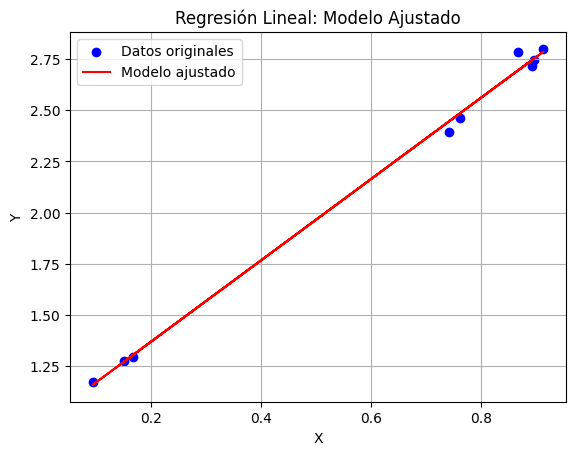

In [ ]:
import matplotlib.pyplot as plt

Y_pred = m * X + b

# Gráfica
plt.scatter(X, Y, color='blue', label='Datos originales')
plt.plot(X, Y_pred, color='red', label='Modelo ajustado')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión Lineal: Modelo Ajustado')
plt.legend()
plt.grid(True)
plt.show()


# Ejercicio 2

# Cálculo del Criterio $ J^* $

El criterio $ J^* $ se calcula como la suma de los errores cuadráticos de los datos originales respecto al modelo lineal ajustado:

$$
J^* = \sum_{i=1}^n \left( y_i - \hat{y}_i \right)^2
$$

donde:
- $ y_i $ son los valores originales de $ Y $,
- $ \hat{y}_i = m^*x_i + b^* $ son los valores predichos por el modelo lineal ajustado.

Utilizando los valores óptimos de $ m^* $ y $ b^* $ obtenidos previamente, se determina $ J^* $, que mide la calidad del ajuste del modelo. El resultado obtenido representa la suma de los errores al cuadrado y es un indicador de la precisión del modelo.


In [ ]:
Y_pred = m * X + b

J_star = np.sum((Y - Y_pred) ** 2) #Error cuadrático

J_star

0.012094252275956428

# Ejercicio 2.1

# Variación de $ m $ y Cálculo de $ J $

Se utiliza la fórmula:
$$
m = m^* + k \varepsilon_m
$$
donde $ \varepsilon_m = \frac{m^*}{N} $ con $ N = 10 $, y $ k \in \{-5, -4, -3, \ldots, 3\} $.

Para cada valor de $ m $, se calcula el criterio $ J $:
$$
J = \sum_{i=1}^n \left( y_i - (m_k x_i + b^*) \right)^2
$$

Finalmente, se grafica la relación entre $ m $ y $ J $, resaltando el valor mínimo $ J^* $ calculado anteriormente.


In [ ]:
# Parámetros
N = 10
epsilon_m = m / N
k_values = np.arange(-5, 4)  # k = {-5, -4, ..., 3}

# Calcular m y J para cada k
m_values = m + k_values * epsilon_m
J_values = [np.sum((Y - (m_k * X + b)) ** 2) for m_k in m_values]


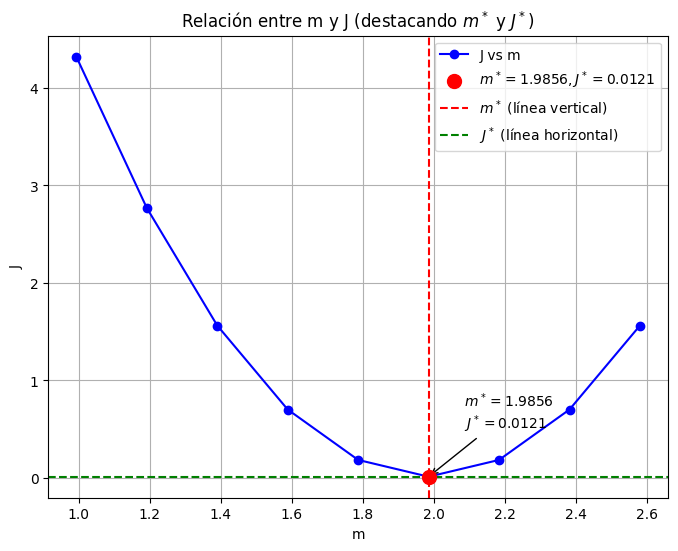

In [ ]:
# Gráfica para m vs J
plt.figure(figsize=(8, 6))
plt.plot(m_values, J_values, label="J vs m", marker='o', linestyle='-', color='blue')
plt.scatter([m], [J_star], color='red', label=f"$m^* = {m:.4f}, J^* = {J_star:.4f}$", zorder=5, s=100)
plt.axvline(x=m, color='red', linestyle='--', label="$m^*$ (línea vertical)")
plt.axhline(y=J_star, color='green', linestyle='--', label="$J^*$ (línea horizontal)")
plt.annotate(f"$m^* = {m:.4f}$\n$J^* = {J_star:.4f}$", xy=(m, J_star),
             xytext=(m + 0.1, J_star + 0.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", color='black'))
plt.xlabel('m')
plt.ylabel('J')
plt.title('Relación entre m y J (destacando $m^*$ y $J^*$)')
plt.legend()
plt.grid(True)
plt.show()


# Ejercicio 2.2

# Variación de $ b $ y Cálculo de $ J $

Se utiliza la fórmula:
$$
b = b^* + k \varepsilon_b
$$
donde $ \varepsilon_b = \frac{b^*}{N} $ con $ N = 10 $, y $ k \in \{-5, -4, -3, \ldots, 3\} $.

Para cada valor de $ b $, se calcula el criterio $ J $:
$$
J = \sum_{i=1}^n \left( y_i - (m^* x_i + b_k) \right)^2
$$

Finalmente, se grafica la relación entre $ b $ y $ J $, resaltando el valor mínimo $ J^* $ calculado previamente.


In [ ]:
# Parámetros
epsilon_b = b / N
k_values = np.arange(-5, 4)  # k = {-5, -4, ..., 3}

# Calcular b y J para cada k
b_values = b + k_values * epsilon_b
J_values_b = [np.sum((Y - (m * X + b_k)) ** 2) for b_k in b_values]

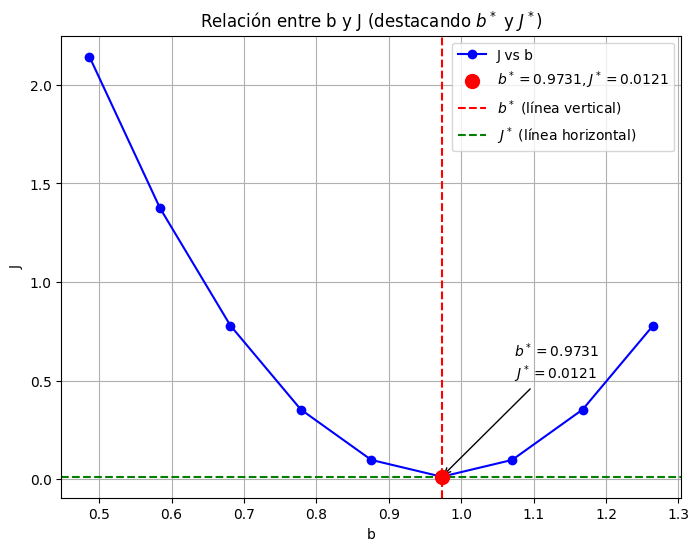

In [ ]:
# Gráfica para b vs J
plt.figure(figsize=(8, 6))
plt.plot(b_values, J_values_b, label="J vs b", marker='o', linestyle='-', color='blue')
plt.scatter([b], [J_star], color='red', label=f"$b^* = {b:.4f}, J^* = {J_star:.4f}$", zorder=5, s=100)
plt.axvline(x=b, color='red', linestyle='--', label="$b^*$ (línea vertical)")
plt.axhline(y=J_star, color='green', linestyle='--', label="$J^*$ (línea horizontal)")
plt.annotate(f"$b^* = {b:.4f}$\n$J^* = {J_star:.4f}$", xy=(b, J_star),
             xytext=(b + 0.1, J_star + 0.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", color='black'))
plt.xlabel('b')
plt.ylabel('J')
plt.title('Relación entre b y J (destacando $b^*$ y $J^*$)')
plt.legend()
plt.grid(True)
plt.show()


# Resultados obtenidos

In [ ]:
resultados = {
    "Pendiente óptima (m*)": m,
    "Intersección óptima (b*)": b,
    "Criterio mínimo (J*)": J_star
}

for clave, valor in resultados.items():
    print(f"{clave}: {valor:.6f}")


Pendiente óptima (m*): 1.985645
Intersección óptima (b*): 0.973064
Criterio mínimo (J*): 0.012094
